In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
leaderboard = pd.read_csv('leaderboard.csv')
leaderboard.head()

,rank,drops,games,highest_rating,highest_streak,last_match,last_match_time,losses,lowest_streak,name,profile_id,rank.1,rating,streak,wins
0,1,1,379,2321.0,19.0,1588793897,1588793897,110,-5.0,TheViper,196240,1,2321,19,269
1,2,80,1073,2261.0,17.0,1588907728,1588907728,334,-6.0,[aM]MbL40C,251265,2,2235,-1,739
2,3,13,435,2233.0,32.0,1588302652,1588302652,103,-4.0,Heresy | dogao,199170,3,2233,7,332
3,4,5,455,2295.0,19.0,1588856609,1588856609,109,-4.0,Nicov,208393,4,2209,1,346
4,5,2,546,2198.0,11.0,1588875805,1588875805,205,-5.0,Villese,208611,5,2194,1,341


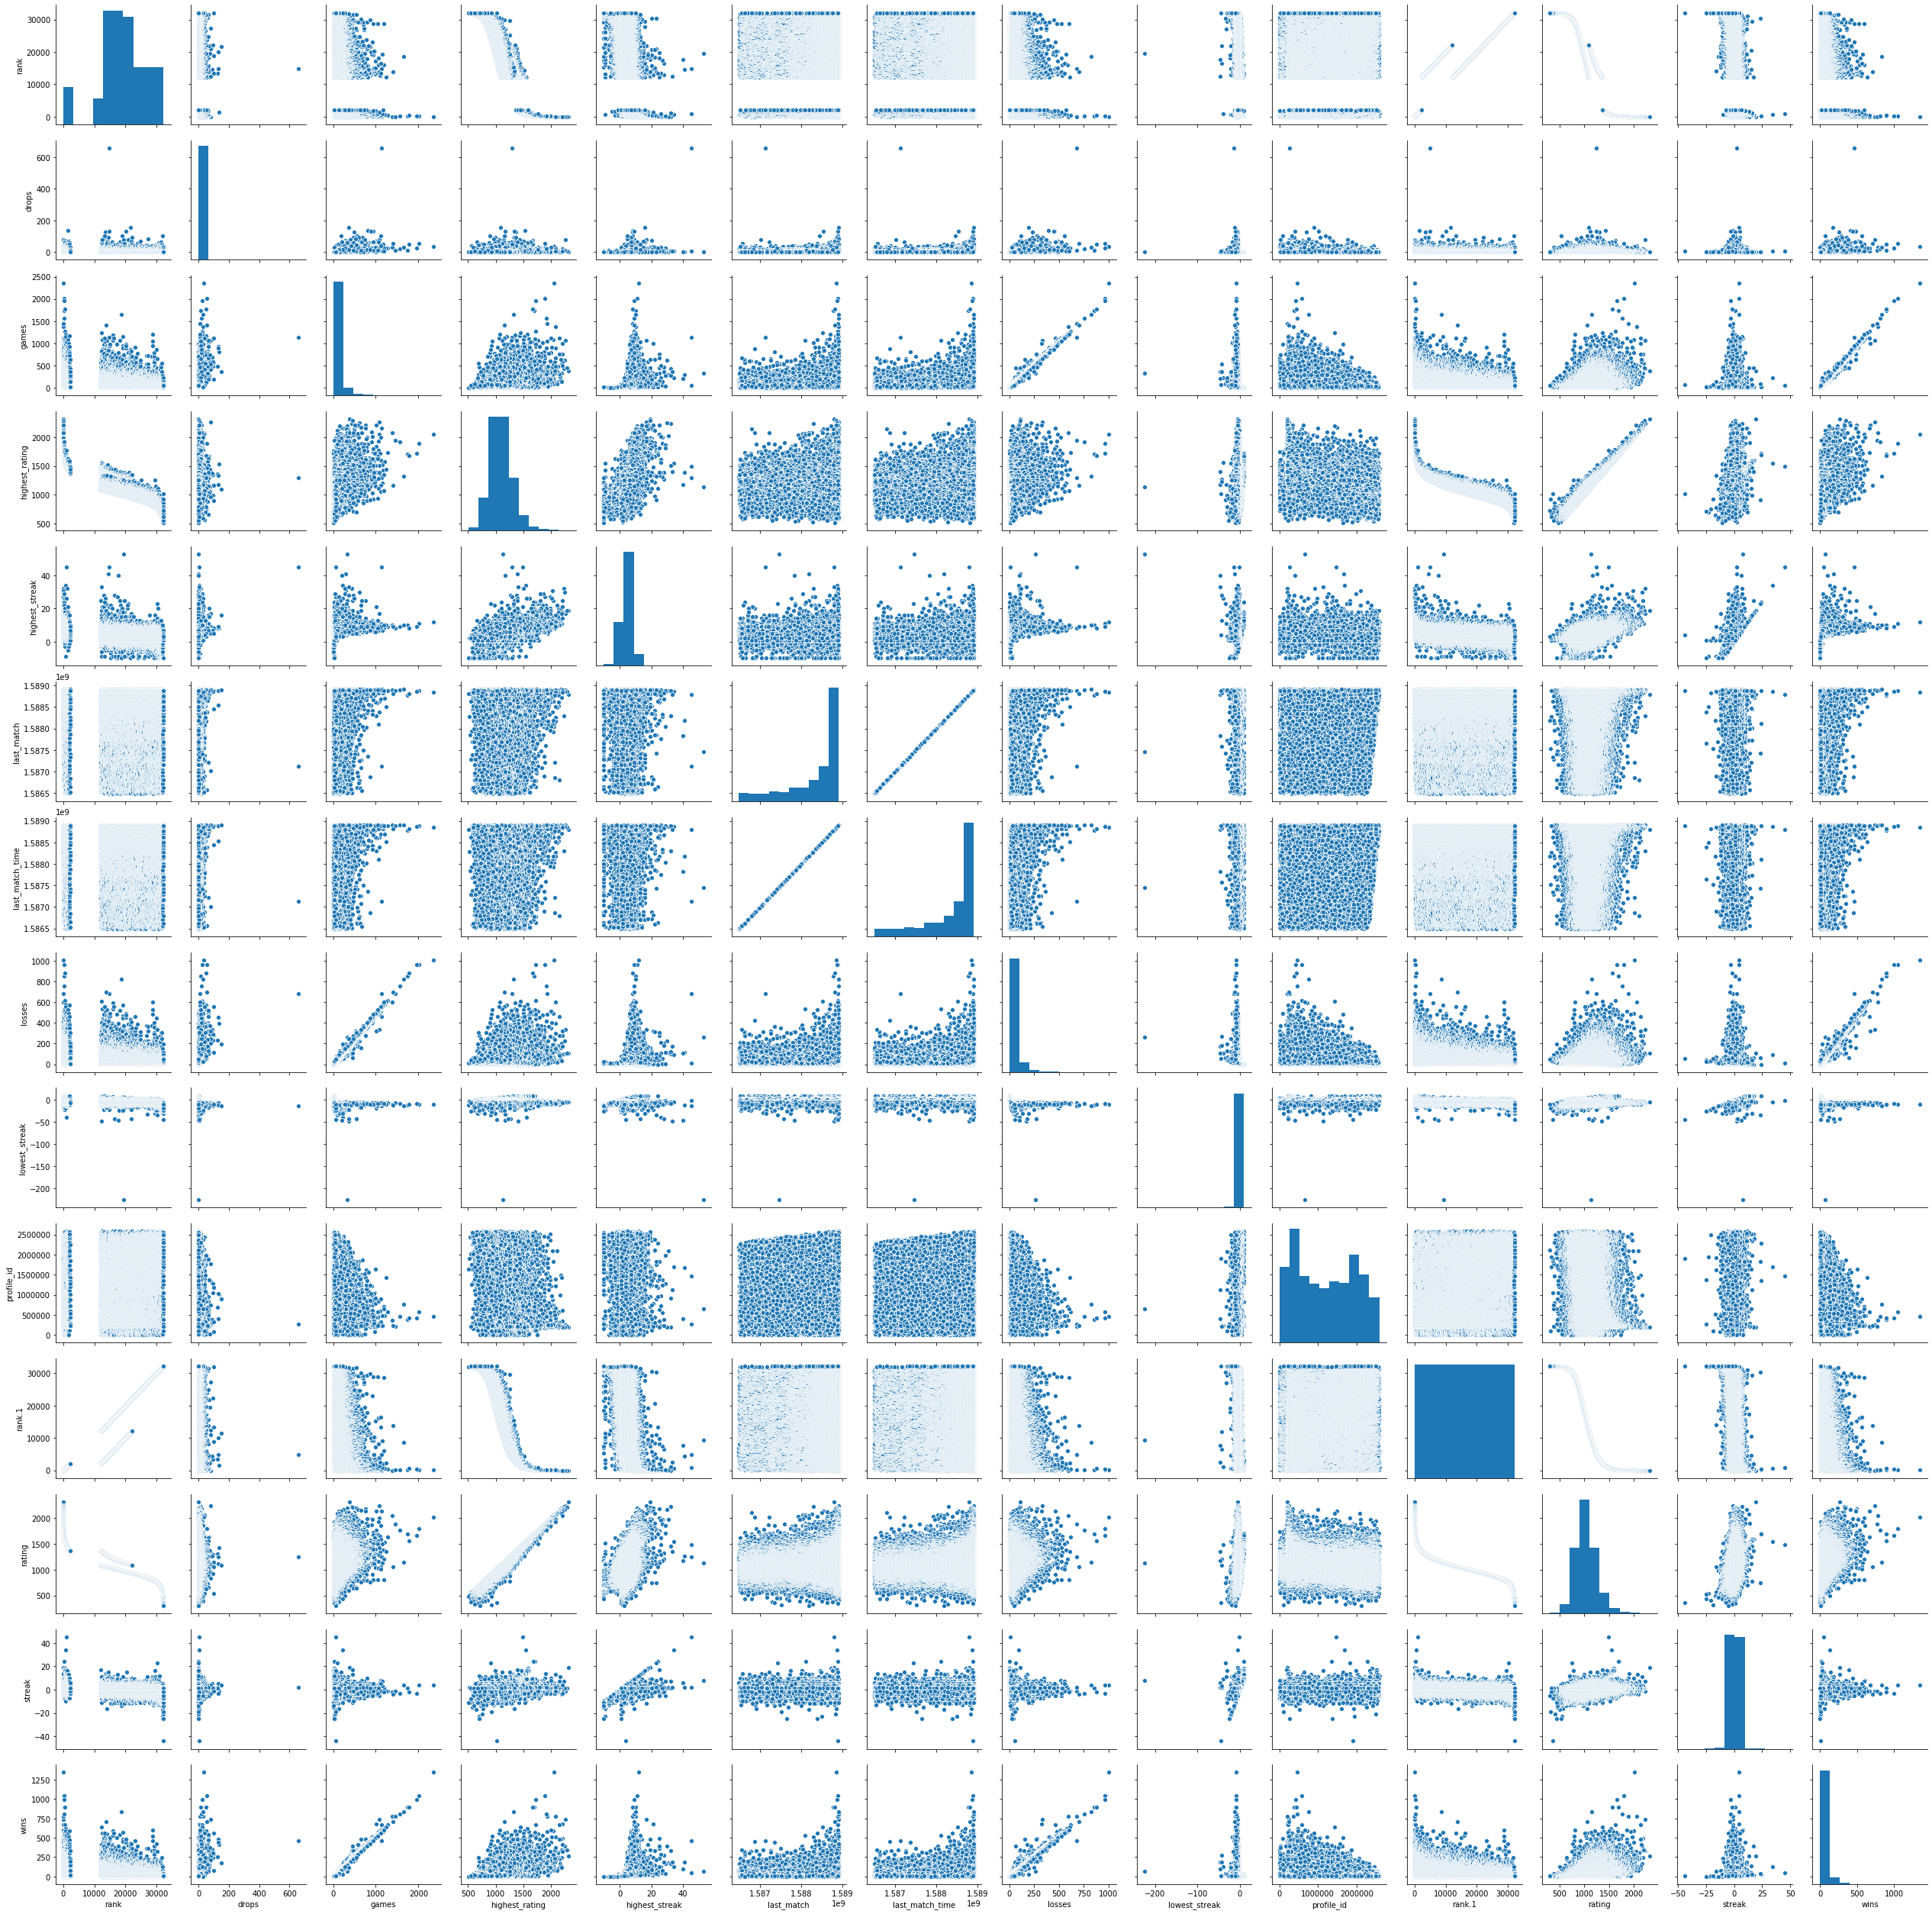

In [6]:
sns.pairplot(leaderboard)

(0, 2507.7783070421533)

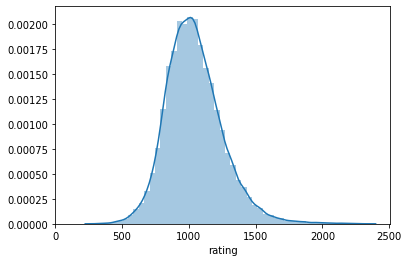

In [7]:
sns.distplot(leaderboard['rating'])
plt.xlim(0, None)

In [8]:
leaderboard['rating'].mean()

1041.785251820955

In [21]:
leaderboard['rating'].median()

1023.0

In [25]:
leaderboard['rating'].quantile(0.99)

1658.0

In [9]:
leaderboard['rating'].std()

212.4802765817537

In [10]:
X = leaderboard[['games']]
y = leaderboard['highest_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
predicted.shape

(9638,)

(0, 2511.291151306209)

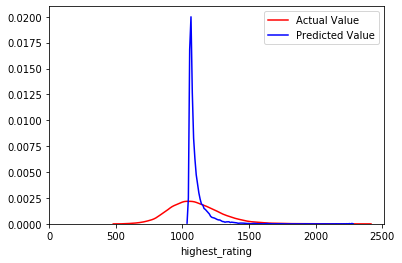

In [12]:
sns.distplot(y_test, hist=False, color='red', label='Actual Value')
sns.distplot(predicted, hist=False, color='blue', label='Predicted Value')
plt.xlim(0, None)

In [15]:
r2 = r2_score(y_test,predicted)
print(r2)

0.13829098346166513


In [17]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predicted_knn = knn.predict(X_test)
accuracy_score(y_test, predicted_knn)

0.0013488275575845611

(0, 2408.3)

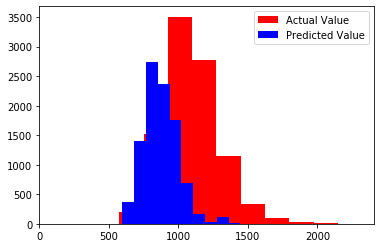

In [18]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_knn, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)

In [20]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
predicted_mlp = mlp.predict(X_test)
accuracy_score(y_test,predicted_mlp)

D:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.0017638514214567338

In [ ]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_mlp, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)